# Computer Vision cơ bản tutorial 4 (P2)

Bài này sẽ tập trung nói về HOG, và machine learning trong computer vision, như mình đã luôn nói thì sự học là vô bờ, những kiến thức được nhắc đến ở đây chỉ là phần nhỏ, rất rất nhỏ trong lĩnh vực Computer Vision, mình chỉ hy vọng qua loạt tut này sẽ giúp các bạn có một số kiến thức nền tảng để tiếp tục nghiên cứu lĩnh vực này.

## 2. Bài tóan Object Detection và một số thuật toán 

![image.png](tut4/1p2.jpg)

Bài toán Object Detection là lớp bài toán trong đó chúng ta cần phải vẽ một bouding box (hình hộp) xung quanh object cần phát hiện (detect), bài toán này trước đây các phương pháp được sử dụng là sử dụng SIFT hoặc HOG, nhưng gần đây deep learning đã thống trị lĩnh vực này.

Trước tiên chúng ta tìm hiểu về phần HOG:
### 1. Phương pháp HOG (Histogram of Orientation):

Như ở bài Harris Conner, chúng ta đã quen thuộc với khái niệm đạo hàm của ảnh, thì HOG cũng tương tự như vậy, chúng ta sẽ tách các đặc trưng của ảnh dựa trên đạo hàm và sliding window để phân loại được ảnh 

*Phần này tham khảo ở link: https://www.learnopencv.com/histogram-of-oriented-gradients/

Thuật toán này gồm các bước:

1. Tiền xử lý + quét sliding window
Để thực hiện object detection, chúng ta sẽ quét một cái sliding window qua ảnh để chọn các khu vực cần xác định là có object hay không, việc lọc nhiễu cũng cần thiết nếu ảnh bị nhiễu.

![image.png](tut4/3p2.jpg)
*Ảnh được lấy từ learnopencv.com, việc chia này là phù hợp với điều kiện của việc tìm kiếm người*  
2. Tính Gradient của vùng ảnh đã được quét qua bởi sliding window

Như các bạn đã biết về khái niệm đạo hàm của ảnh và toán tử Sobel ở các baì trước, thì tư tưởng chủ yếu cảu HOG là chúng ta sẽ tính đạo hàm (gradient, thực chất gọi gradient cũng chưa chắc đúng về mặt toán, nhưng đó là vấn đề của giải tích 2) của ảnh theo 2 chiều x và y, sau đó tính ra được vector đạo hàm của một điểm. *Chú ý rad hay deg :> *

$Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)$

3. Chia vùng đã được tính gradient thành các Cell

![image.png](tut4/2p2.png)

Sau khi tính xong đạo hàm thì chúng ra sẽ chia hình thành từng phần nhỏ (cell) để tính, việc chia cell này nhằm tránh nhiễu, vì một đạo hàm thì có thể sai, nhưng một cell cộng trung bình hoặc lấy giá trị lớn nhất thì sẽ tốt hơn. Trong bài này, hình được chia thành các cell 8 * 8 pixel, vì 8 * 8 * 2 = 128 (2 giá trị độ lớn và hướng của đạo hàm), sẽ dễ chia thành các khoảng cho hướng của đạo hàm hơn.

![image.png](tut4/4p2.png)

Nếu các bạn không tưởng tượng được thì đạo hàm ở đây sẽ có dạng như vầy, nó thể hiện sự sai khác giữa các thành phần của ảnh, giữa anh da đen và nền.

Hướng của đạo hàm sẽ quyết định đạo hàm đóng góp vào chỗ nào trong histogram, còn độ lớn của vector gradient được cộng vào histogram, ví dụ nếu góc là 10, thì độ lớn được chia tỉ lệ cho 2 slot 0 đến 20 như hình, còn nếu góc đúng bằng 80 thì đưa vào trong slot 80 luôn

![image.png](tut4/5p2.png)

Sau khi cộng cả 64 pixel, thì ta sẽ có histogram of orientation cho 1 cell

4. Tính trung bình cho các bộ cell
![SegmentLocal](tut4/hog.gif "segment")

Thuật toán này rất nhạy cảm với cường độ ánh sáng thay đổi, ví dụ cường độ ánh sáng giảm 1/2, cường độ đạo hàm giảm 1/2, rồi histogram thay đổi, chính vì vậy chúng ta cần chia các vector này cho trung bình L2 (khoảng cách hình học https://en.wikipedia.org/wiki/Euclidean_distance) các histogram trong bộ 2 * 2 hoặc 3 * 3 cell này.

Ví dụ ta chia histogram như hình trên thì mỗi cái cell có 9 giá trị, 9 giá trị này được ghép lại cho 1 khối 2 * 2, thì ta sẽ được một vector 36 * 1, sau khi tính trung bình L2 cho cả 36 giá trị này, ta chia vector 36 * 1 cho trung bình L2 này, việc này giúp những thay đổi ánh sáng trên cả 4 cell sẽ ảnh hưởng đến cả 34 cell và giảm bớt sự phụ thuộc vào ánh sáng.

Như vậy chúng ta đã có bộ histogram cho phần ảnh được quét này. Từ đay chúng ta có thể sử dụng các phương pháp machine learning hoặc so sánh bằng khoảng cách hình học để biết được đối tượng này có phải đối tượng cần tìm không.

## Và chúng ta đã đến với machine learning :> sau một quá trình đi lên từ dò màu 

Để hiểu về machine learning nó là một cái tầm khác rồi, nên trong bài này mình chỉ hướng dẫn các bạn về mấy thứ cơ bản, chạy được thôi nha :3 

Để phân loại cái tính chất của ảnh, chúng ta có thể dùng thuật toán kNN - K nearest neighbor, các bạn có thể tìm hiểu thêm ở trang machinelearningcoban, giải thích sơ qua nó là như này:

1. Cho một tập data k chiều và có n phần tử, các phần tử này được đánh dấu trước
2. Nếu có một điểm dữ liệu mới đưa vào, tính khoảng cách trong không gian từ điểm đó đến các điểm đã đánh dấu
3. Sắp xếp các khoảng cách từ điểm đã cho đến các điểm còn lại từ bé đến lớn, lấy ra k giá trị đầu tiến
4. Xét xem trong k giá trị đầu tiên cái nào nhiều nhất thì chọn đó là class của điểm mới thêm vào

Nói chung là nó khá dumb, cơ mà nó dễ và nó work nên mình xài thôi

## Lý thuyết quá nhiều rồi, giờ là thực hành

Để tạo ra đối tượng HOG, chúng ta dùng code sau cho OpenCV:

In [31]:
import cv2
image = cv2.imread("cat.jpg",0)

winSize = (64,64)    # kích thước cửa sổ 
blockSize = (16,16)  # kích thước block
blockStride = (8,8)  # mức trượt của block (tức block nhảy qua mấy pixel, trong trường hợp này thì nhẩy qua 8)
cellSize = (8,8)     # kích thước 1 cell
nbins = 9            # độ chia của histogram 
derivAperture = 1    # kích thước bộ lọc Sobel được sử dụng 
winSigma = 4.        
histogramNormType = 0   # Kiểu khoảng cách được sử dụng 
L2HysThreshold = 2.0000000000000001e-01 # Ngưỡng lọc nhiễu 
gammaCorrection = 0     
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations) #tính hog cho 1 window tại điểm ((10,20)) trở đi 
# Shape của histogram lúc ra sẽ là 1764 

print(hist)
print(hist.shape)

[[0.20691521]
 [0.01647541]
 [0.0271855 ]
 ...
 [0.06730335]
 [0.06661798]
 [0.3313251 ]]
(1764, 1)


Bằng cách sử dụng một vòng for, chúng ta có thể quét qua hết ảnh bằng hog này, tuy nhiên hơi khó visualize nên mình sẽ dùng scikit-image cho các bạn dễ nhìn.

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


(600, 400, 3)


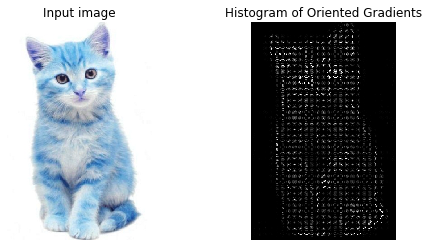

In [3]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

import cv2
image = cv2.imread("cat1.jpg")

# image = data.astronaut()
print(image.shape)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


Còn về phần machine learning, chúng ta sẽ sử dụng sklearn, mình sẽ demo về chữ viết tay HOG cho các bạn coi, phần này chỉ là detect trong dataset sẵn có.

Chúng ta sẽ sử dụng bộ dataset người để train (các bạn có thể tự tạo dataset cũng được, tải ảnh bất kì thứ gì về và train), để trong thư mục data mình lấy ở đây: https://github.com/BUPTLdy/human-detector

## 1. Đọc data 
Các bạn có thể tham khảo code đọc tất cả ảnh trong một folder dưới đây, bộ dữ liệu này gồm 2 tập, 1 là những ảnh có hình người ở trong, và một tập là các hình không có người ở trong, chúng ta sẽ đọc 2 tập này, đồng thời tạo thêm 1 list là label, tức gán nhãn của các tập này nhằm phục vụ mục đích training, tập có người kí hiệu là 1, không có người kí hiệu là 0:

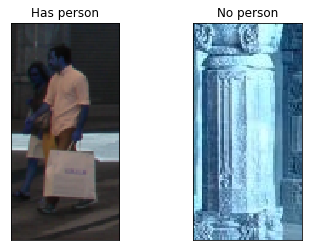

2416
4146
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
import cv2
import os

pos_folder = "./data/images/pos_person"
neg_folder = "./data/images/neg_person"

has_person = []
no_person = []
label = []

for filename in os.listdir(pos_folder):
    img = cv2.imread(os.path.join(pos_folder,filename))
    if img is not None:
        has_person.append(img)
        label.append(1)
        
for filename in os.listdir(neg_folder):
    img = cv2.imread(os.path.join(neg_folder,filename))
    if img is not None:
        no_person.append(img)
        label.append(0)


plt.subplot(121),plt.imshow(has_person[0],cmap = 'gray')
plt.title('Has person'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(no_person[1],cmap = 'gray')
plt.title('No person'), plt.xticks([]), plt.yticks([])
plt.show()

print(len(has_person))
print(len(no_person))

print(label)

## 2. Tạo đối tượng HOG và tính HOG cho dataset

Bộ data này đã cho chúng ta độ lớn là 128*64, nên ta sẽ sử dụng kích thước này cho HOG của mình, ta sẽ tính tất các các HOG vector trong tập data này để huấn luyện mô hình machine learning của mình 

In [ ]:
orientations = 9
pixels_per_cell = [6, 6]
cells_per_block = [2, 2]



feature = []

for i in has_person:
    gray = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    hist =  hog(image, orientations, pixels_per_cell,cells_per_block, visualize=False)
    feature.append(hist)
#     print(len(feature))
for i in no_person:
    gray = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    hist = hog(image, orientations, pixels_per_cell,cells_per_block, visualize=False)
    feature.append(hist)
#     print(len(feature))

## 3. Huấn luyện một cái kNN để train bộ data này nào :3

Thư viện sklearn cho phép ta huấn luyện một cái kNN rất đơn giản, chỉ tạo đối tượng, fit, predict, rất rất đơn giản

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

feature = np.array(feature)
print(feature.shape)
feature = np.reshape(feature,(6562, 3780))

print(feature.shape)

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(feature,label)

#Predict Output
print(feature[:,0].shape)
predicted = model.predict(feature[0,:].reshape(1, -1)) # 0:Overcast, 2:Mild
print(predicted)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2)

test = model.predict(X_test)

print(accuracy_score(test, y_test))

Các bạn có thể thấy độ chính xác khá là thấp đúng không nào :">, đã vậy mình chạy cái predict này mà tốn lận vài phút, nói chung là quá chậm chúng ta sẽ thử các khác, đó là SVM, SVM là gì, làm sao lại có SVM, các bạn có thể tham khảo thêm ở https://machinelearningcoban.com/2017/04/09/smv/

In [40]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
clf.fit(feature,label) 


SVC(C=100000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Chính xác hơn 1 chút rồi đó :3, vậy ta đến bước cuối đó là quét bounding box qua khắp ảnh:
        

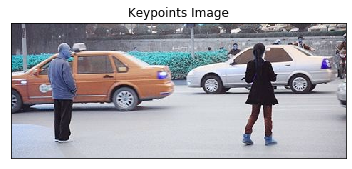

(190, 470, 3)


In [38]:
img = cv2.imread("test_image/2.png")
plt.imshow(img,cmap = 'gray')
plt.title('Keypoints Image'), plt.xticks([]), plt.yticks([])
plt.show()
print(img.shape)

In [44]:
h = img.shape[0]
w = img.shape[1]
from skimage.transform import pyramid_gaussian
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for im_scaled in pyramid_gaussian(img, downscale = 1.25):
        #The list contains detections at the current scale
    if im_scaled.shape[0] < 128 or im_scaled.shape[1] < 64:
        break
    for i in range(0,h - 128,10):
        for j in range(0,w - 64,10):
            img_sliding = im_scaled[i:i+128, j:j+164]
            location = (i,j)
            hist = hog(image, orientations, pixels_per_cell,cells_per_block, visualize=False)
    #         print(hist.reshape(1,-1).shape)
            if(model.predict(hist.reshape(1,-1)) == 1):
                print(i,j) #in điểm bounding box


0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
0 100
0 110
0 120
0 130
0 140
0 150
0 160
0 170
0 180
0 190
0 200
0 210
0 220
0 230
0 240
0 250
0 260
0 270
0 280
0 290
0 300
0 310
0 320
0 330
0 340
0 350
0 360
0 370
0 380
0 390
0 400
0 410
0 420
0 430
0 440
0 450
0 460
10 0
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
10 110
10 120
10 130
10 140
10 150
10 160
10 170
10 180
10 190
10 200
10 210
10 220
10 230
10 240
10 250
10 260
10 270
10 280
10 290
10 300
10 310
10 320
10 330
10 340
10 350
10 360
10 370
10 380
10 390
10 400
10 410
10 420
10 430
10 440
10 450
10 460
20 0
20 10
20 20
20 30
20 40
20 50
20 60
20 70
20 80
20 90
20 100
20 110
20 120
20 130
20 140
20 150
20 160
20 170
20 180
20 190
20 200
20 210
20 220
20 230
20 240
20 250
20 260
20 270
20 280
20 290
20 300
20 310
20 320
20 330
20 340
20 350
20 360
20 370
20 380
20 390
20 400
20 410
20 420
20 430
20 440
20 450
20 460
30 0
30 10
30 20
30 30
30 40
30 50
30 60
30 70
30 80
30 90
30 100
30 110
30 120
30 130
30 140

KeyboardInterrupt: 

Không biết tại sao cơ mà HOG của mình kết quả rất kém, các bạn có thể tự chạy phần của mình để coi có sai sót gì không (khá là chậm :"( )

![image.png](tut4/hetsuc.png)

Thôi kệ, mình sẽ coi đây như là sự superior của Deep learning so với HOG :>

## 2 Deep learning cho bài toán object detection 

Trước đây, các thuật toán Computer Vision đều là các thuật toán được chọn lựa cẩn thận từng kernel convolution sao cho có hiệu quả tốt nhất và cách xử lý sáng tạo nhất, cho đến một ngày, có một người nghĩ rằng: tại sao không xếp chồng một mớ phép convolution lại, rồi tìm cách tối ưu hóa những phép convolution ấy đến mức tối đa, mặc kệ mấy cái thứ tricky như các thuật toán ngày xưa, và thế là Convolution Neural Network ra đời, và rất rất nhiều thuật toán Computer Vision cổ điển về vườn :">

![image.png](tut4/lecun.jpeg)

*Yann LeCun, tác giả CNN*

Với mục tiêu là nói sơ qua về machine learning, chắc chắn mình không thể nào mà cover hết lý thuyết về nó, hãy coi tut này như một sự bắt đầu hành trình tìm hiểu của bản thân :">

Về tài liệu về Deep learning và CNN, mình giới thiệu khóa cs231n của Standford, đây là một khóa về deep learning trong computer vision rất hay và đầy đủ, đồng thời level cũng khá là cao (vì đây là khóa chính thức của Standford chứ không phải mấy khóa online course, project của khóa này cũng khá là nhiều cái được đăng lên tạp chí khoa học)

link blog: http://cs231n.github.io/

### Mở rộng phép convolution

Thực ra là với bài phép convolution mình đã quên một số trường hợp, ví dụ như quét hết cái ảnh bằng kernel mà nó không fit, tức còn dư vài chỗ thì sao, rồi sau khi quét kernel thì di chuyển bao nhiêu bước, những cái này chưa xét đến, bây giờ ta sẽ định nghĩa những thành phần đó như sau:
* Ta gọi kích thước ảnh ban đầu là I
* Kích thước Kernel là F
* Nếu như ảnh không "vừa" với kernel convolution thì ta thêm một số lớp số 0 vào, gọi là padding, ta gọi là P:

![SegmentLocal](tut4/padding.gif "segment")

Padding này có nhiều kiểu, nhưng chủ yếu là zero-padding, độ rộng lớp thêm vào này là thông số của lớp convolution.

* Bước trượt của kernel trên ảnh gọi là stride, ta gọi là S:
![SegmentLocal](tut4/stride.gif "segment")

Vậy Output ra sẽ có chiều là $ O = (I + 2*P - F)/S + 1 $ (Kernel vuông nhé, không ai biến thái mà đi làm kernel chữ nhật đâu :> )

Trong thực tế kernel có kích thước thường là từ (3 * 3), (5*5),(7*7),... stride thường là 1 hoặc 2, padding thường là 1 hoặc 2

### Kiến trúc Convolution Neural Network

Tất nhiên vấn đề hiểu được neural network có rất nhiều thứ và yêu cầu nhiều toán, nên ở bài này chúng ta cứ biết là có thể huấn luyện CNN thực hiện phân loại ảnh hay Object detection là công việc tối ưu hóa các kernel convolution trong mạng, để làm việc này thì phương pháp sử dụng là tính đạo hàm cho từng cái kernel bằng phương pháp lan truyền ngược (back propagation), sau đó tối ưu hóa bằng phương pháp gradient descent, mình nhớ trong môn phương pháp tính hình như có học bài tính xấp xỉ bằng đạo hàm, thì nó gần giống như vậy.

Thường thì neural network không thể tìm được cực đại toàn cục cho một bộ dữ liệu, mà chỉ tìm được cực địa phương.

Các thành phần cấu tạo CNN là những "lớp" (layer) như sau (hãy tưởng tượng là output của lớp này sẽ là input của lớp tiếp theo, cho đến cuối):

1. Lớp Convolution:

Lớp này thì như những gì ta đã nói tới, có khác ở chỗ là với ảnh RGB thì mỗi kernel xử lý 3 lớp ảnh và cộng lại, và thường là có rất rất nhiều lớp convolution, các bạn có thể tham khảo cách Convolution Layer hoạt động ở: http://cs231n.github.io/convolutional-networks/

Khi các lớp convolution tính xong, output của chúng được ghép lại thành các "khối", những "khối" này được gọi là tensor (hãy hiểu là ma trận nhưng nhiều chiều), cách tính convolution cho các khối này cũng giống như xử lý với các ảnh RGB, tensor cũng là nghĩa của Tensor trong tensorflow :3

2. Lớp Pooling:

Để giảm số chiều, ta có thể thực hiện quét qua cả ảnh với cửa sổ, ví dụ 2 * 2 và chọn ra số lớn nhất trong 4 số trong cửa sổ để lấy làm output, từ đó giảm số chiều đi 2 lần
![image.png](tut4/maxpool.jpeg)

3. Lớp Fully Connected:

Sau khi dữ liệu được đi qua một số lớp convolution và pooling liên tiếp thì chúng sẽ được đưa đến đoạn cuối, là một neural network thường (https://machinelearningcoban.com/2017/02/24/mlp/) để phân loại đối tượng thành từng lớp, hoặc cao hơn là để thực hiện object detection từ output của các lớp mạng trước 

![image.png](tut4/feature.png)

Output của các thành phần trước đến đây được gọi là feature map, các đặc trưng hữu ích của ảnh đã được lọc lại và đưa vào trong feature map này, đến đây có nhiều cách xử lý feature map này, từ đó đã sinh ra nhiều thuật toán khác nhau, ví dụ Yolo, Mobilenet - SSD,...

Ví dụ: Kiến trúc VGGnet-16:
![image.png](tut4/vgg.png)
Kiến trúc này khá đơn giản, chỉ gồm các kernel 3 *3 nối tiếp nhau, sau đó là các lớp pooling để giảm số chiều 

Ví dụ khác: Kiến trúc SSD lấy feature map từ VGG và thực hiện object detection
![image.png](tut4/ssd.png)

Ưu điểm:
* Độ chính xác vượt trội so với các phương pháp truyền thống
* Bộ dữ liệu huấn luyện càng lớn hiệu quả càng cao, khác với các phương pháp truyền thống là dữ liệu càng nhiều càng khó tốt 
Nhược điểm:
* Cần bộ dữ liệu lớn đế có thể hoạt động tốt
* Không sử dụng tính chất liên hệ giữa các feature (đặc tính) của ảnh, tham khảo thêm ở https://danglamtung.github.io/CNN/

Để thực hiện sử dụng (chưa train nhé :3) CNN và deep learning nói chung, chúng ta cần cài đặt Tensorflow, lưu ý là nó khá nặng nên các bạn cẩn thận :3

In [1]:
pip install tensorflow

     |████████████████████████████████| 421.8 MB 21 kB/s  eta 0:00:01    |████▉                           | 63.8 MB 2.8 MB/s eta 0:02:08     |███████▏                        | 94.3 MB 4.5 MB/s eta 0:01:14     |████████                        | 106.8 MB 3.1 MB/s eta 0:01:43
     |████████████████████████████████| 41 kB 434 kB/s eta 0:00:011
     |████████████████████████████████| 448 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 320 kB/s eta 0:00:011
     |████████████████████████████████| 50 kB 743 kB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 1

Các bạn có thể thử demo hàng auth ở đây: https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb
Đặc biệt có thể chạy trên google colab, một dịch vụ hỗ trợ cho phép sử dụng GPU để tăng tốc quá trình chạy tensorflow online hoặc chạy code của mình :3 


In [5]:
import tensorflow as tf 

Tensorflow là thư viện về tính toán ma trận, hay đúng hơn là tensor, tức ma trận nhiều chiều nên kiểu dữ liệu cơ bản của nó là tensor, tensor có rank, shape, type
*Chú ý: Tensorflow 2.0 hiện tại đã hợp nhất với Keras, một thư viện đơn giản hơn, tut này dựa trên Tensorflow 1 object detection, phiên bản 2.0 đang alpha nên nói chung chạy được code là được :3 *

Tuy nhiên mình cũng muốn nói một chút về Tensorflow 1, lý do mà nó bị thay bới Keras ở bản 2 là vì nó khá chuối :"<, nhưng object detection api nó chưa có cập nhật nên nói chung là đá sơ qua vài tính chất của bản 1:

Về kiểu dữ liệu của tensorflow, thì, tất nhiên là tensor rồi :">, Tensor có các tính chất:
* Rank: hiểu như là "chiều" của data, với số tự nhiên là 1, ma trận là 2, ảnh 3 chiều rgb thì là tensor 3 chiều...
* Shape: giống shape của numpy array
* Type: kiểu dữ liệu của tensor, có thể là int, float,...

Để thực hiện viết một chương trình bằng tensorflow, chúng ta phải xây dựng một Graph, 
![image.png](tut4/tfgraph.png)

Ưu điểm của graph là với các mô hình lớn, ta có thể dùng graph view để xem xét từng tensor dễ dàng hơn
Ví dụ một graph:

In [29]:
x = tf.constant(1., dtype=tf.float32, name="Node_1")
y = tf.constant(2., dtype=tf.float32, name="Node_2")
f = x + y
print(x)
print(y)
print(f)

Tensor("Node_1_2:0", shape=(), dtype=float32)
Tensor("Node_2_2:0", shape=(), dtype=float32)
Tensor("add_1:0", shape=(), dtype=float32)


Chúng ta đã xây dựng được một cái Graph f = x + y với 2 node là Node_1 và Node_2, giờ thì để chạy chúng ta cần tạo đối tượng Session để chạy:

In [30]:
with tf.Session() as sess:
    print(sess.run(f))

3.0


Có rất nhiều hàm cài sẵn trong tensorflow, các hàm tính convolution, pooling rất thuận tiện cho việc xây dựng graph, tuy nhiên nó chuối quá nên qua bản 2.0 lấy luôn keras cho nhẹ óc :))) nên phần trên mình viết để các bạn hiểu mình đang làm gì thôi :>

### Thực hiện chạy một mô hình object detection với tensorflow 
Các bạn vào https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
Tải ssd_mobilenet_v1_coco về, giải nén trong cùng folder với jupyter notebook này và làm theo hướng dẫn 

In [21]:
import tensorflow.compat.v1 as tf # Xài bản 1 bằng cách này 
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

#Class Detector API, nếu các bạn chưa biết nó là gì thì :> đọc thêm nha 
class DetectorAPI:
    def __init__(self, path_to_ckpt):
        self.path_to_ckpt = path_to_ckpt
        
        self.detection_graph = tf.Graph()
        with self.detection_graph.as_default():
            od_graph_def = tf.GraphDef()
            with tf.gfile.GFile(self.path_to_ckpt, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')
        #Load mạng neuron đã train sẵn (gọi là pretrain)
        
        self.default_graph = self.detection_graph.as_default() # Tạo session, cái này của tensorflow 1 :>, sắp bị bỏ
        self.sess = tf.Session(graph=self.detection_graph)

        # Định nghĩa input, mỗi tensor trong mô hình này đều có tên, đơn giản là ta gọi tên nó thôi
        self.image_tensor = self.detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Gọi ra output đầu tiên là cái hình bao của ảnh đã được gặp 
        self.detection_boxes = self.detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Đây là các điểm score thể hiện độ chính xác của việc detect 
        self.detection_scores = self.detection_graph.get_tensor_by_name('detection_scores:0')
        self.detection_classes = self.detection_graph.get_tensor_by_name('detection_classes:0')
        self.num_detections = self.detection_graph.get_tensor_by_name('num_detections:0')

    def processFrame(self, image): # Hàm xử lý việc nhận diện 
        # reshape input về [1, None, None, 3]
        image_np_expanded = np.expand_dims(image, axis=0)
        # Bắt đầu detection.
        start_time = time.time()
        
        (boxes, scores, classes, num) = self.sess.run(
            [self.detection_boxes, self.detection_scores, self.detection_classes, self.num_detections],
            feed_dict={self.image_tensor: image_np_expanded})
        # Phần này chạy session đã được nạp graph vào 
        end_time = time.time()

        print("Elapsed Time:", end_time-start_time)

        im_height, im_width,_ = image.shape
        boxes_list = [None for i in range(boxes.shape[1])]
        for i in range(boxes.shape[1]):
            boxes_list[i] = (int(boxes[0,i,0] * im_height),
                        int(boxes[0,i,1]*im_width),
                        int(boxes[0,i,2] * im_height),
                        int(boxes[0,i,3]*im_width))
        #Bounding box trả về là dạng số float tỉ lệ với khung ảnh, nên phải nhân lại với độ lớn ảnh 
        return boxes_list, scores[0].tolist(), [int(x) for x in classes[0].tolist()], int(num[0])

    def close(self):
        self.sess.close()
        self.default_graph.close()

In [22]:
tf.disable_v2_behavior()
model_path = './ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb'
odapi = DetectorAPI(path_to_ckpt=model_path)

Elapsed Time: 0.06653547286987305


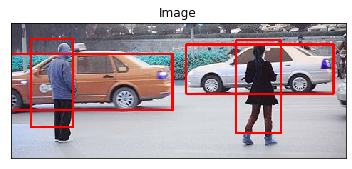

(190, 470, 3)


In [24]:
img = cv2.imread("test_image/2.png")
threshold = 0.4        
boxes, scores, classes, num = odapi.processFrame(img)

        # Visualization of the results of a detection.
center = []
for i in range(len(boxes)):
    if scores[i] > threshold:
        box = boxes[i]
        cv2.rectangle(img,(box[1],box[0]),(box[3],box[2]),(255,0,0),2)
        
plt.imshow(img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

print(img.shape)

Thực sự có một sự thật đau lòng trong lĩnh vực computer vision và nlp (xử lý ngôn ngữ tự nhiên) đó là thuật toán càng phức tạp lại càng kém hơn so với thuật toán deep learning, những thuật toán mà chỉ cần stack more layer :"> 
![image.png](tut4/meme.png)

Như các bạn có thể thấy là detect rất rất tốt người, với máy mình thì thực hiện chỉ 0.0665 giây, tức là khoảng 15 fps. 
Đến đây, series về computer vision cơ bản của mình cũng đến hồi kết, thực sự chúng ta mới chỉ động chạm được đến bề nổi của cả một lĩnh vực rộng lớn như Computer Vision, hy vọng những tutorial này có ích cho các bạn trong con đường học tập.

Tài liệu đọc thêm:
Tensorflow 2.0 tutorial: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=vi
Machine Learning cơ bản: https://machinelearningcoban.com/
Một tutorial đầy đủ hơn: https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html